# Working with numpy array index system

Numpy arrays will be the primary object type that we deploy for storing 
data in the computer's memory. 
In order to access data from such arrays we need to work with the index system.


## Arrays of 1-dimensional shape

In this class we want to practice how we can choose a subsample of the data elements stored in an array. We use matplotlib.pyplot to illustrate the effects of the index selections.

The examples in this notebook can serve as a quick reference sheet for later.

In [2]:
%matplotlib inline

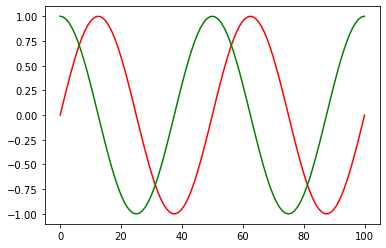

In [3]:
import matplotlib.pyplot as plt
import numpy as np


L=50.0
x=np.arange(0,101,1)
sindata=np.sin(2*np.pi*x/L)
cosdata=np.cos(2*np.pi*x/L)


plt.plot(x,sindata,color='red')
plt.plot(x,cosdata,color='green')
plt.show()

### <span style="color:blue">Problem 1:</span> 
We have two functions in this plot. For people with indifferent perception of red and green color tones we want add symbols two line symbols to distinguish the lines. However, not every data point, only every 5th or 10th point we want to plot a marker (for example an 'x' or '+' sign or a filled circle). 


### <span style="color:darkgreen">Solution 1:</span> 

We can create a list or 1-dimensional numpy array that contains index position numbers. Then, we use the index-list (numpy array) inside the square brackets of the variables x, sindata, and cosdata.

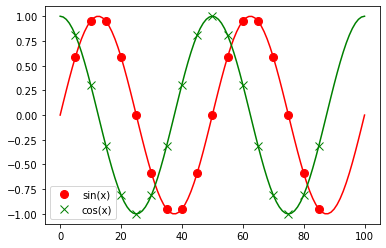

In [4]:
ihelp=np.arange(5,90,5)
plt.plot(x,sindata,color='red')
plt.plot(x,cosdata,color='green')
plt.plot(x[ihelp],sindata[ihelp],'o',color='red',markersize=8,label='sin(x)')
plt.plot(x[ihelp],cosdata[ihelp],'x',color='green',markersize=8,label='cos(x)')

plt.legend()


### <span style="color:blue">Problem 2:</span> 

We want to use red and blue bars for plotting positive and negative values in the sine function.

### <span style="color:darkgreen">Solution 2a:</span> 

The function plt.fill_between allows us to shade area between the functions curve and a reference level.
We must find the index ranges that belong to (a) positive values in _sindata_, first.
This can be done with a boolean expression.

Variable *is_positive* is a numpy array that contains True and False values.")
The shape of the array is the same as *sindata*, the array that we used in the boolean expression.
Use the functions *type(is_positive)*, *np.shape(is_positive)*, *np.shape(sindata)* and *np.shape(sindata[is_positive])* to check the results of the numpy array operations.


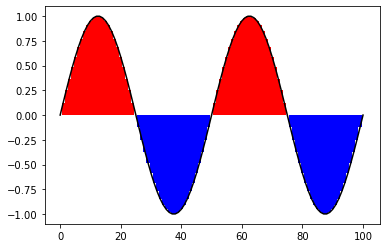

In [5]:
# remember x is our numpy array with the x-coordinates
# and sindata the y-coordinates

plt.plot(x,sindata,color='black')

is_positive=sindata>0
plt.bar(x[is_positive],sindata[is_positive],color='red',width=1)

is_negative=sindata<0
plt.bar(x[is_negative],sindata[is_negative],color='blue',width=1)
plt.show()

#print(type(is_positive))
#print("is_positive contains True and False values.")
#print("The shape of the array is the same as sindata")
#print(np.shape(is_positive))
#print(np.shape(sindata))



### <span style="color:darkgreen">Solution 2b:</span> 

The function plt.fill_between allows us to shade area between the functions curve and a reference level.

We must find the index ranges that belong to (a) positive values in _sindata_, first.

This can be done with a boolean expression.

In [6]:
is_positive=sindata>0
print(type(is_positive))
print("is_positive contains True and False values.")
print("The shape of the array is the same as sindata")
print(np.shape(is_positive))
print(np.shape(sindata))

<class 'numpy.ndarray'>
is_positive contains True and False values.
The shape of the array is the same as sindata
(101,)
(101,)


### <span style="color:darkgreen"> (Optional Solution 2b:)</span> 

We can try the following instead: we can use _is_positive_ numpy array to assign new values to the sindata where it is NOT > 0.

Important: Make sure you work with a copy of your numpy array. Leave your orginal array that was assigned to *sindata* unmodified! 

Function *np.copy()* can be used to create a copy of a numpy array. 

The function plt.fill_between allows a polygon fill plot. It needs a third value or array for the lower bound. 
Here it is the variable *reflevel* (reference level) set to 0.



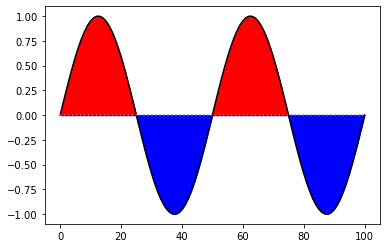

In [7]:
plt.plot(x,sindata,'-',color='black')
plt.plot(x,0*sindata,':',color='grey')
reflevel=0.0

# red-shading 
scopy1=np.copy(sindata)
is_negative=scopy1 <0
scopy1[is_negative]=0 #overwrite negative values with 0
plt.fill_between(x,scopy1,reflevel,color="red")

# blue-shading
scopy2=np.copy(sindata)
is_positive=scopy2 >0
scopy2[is_positive]=0 # overwrite positive values with 0
plt.fill_between(x,scopy2,reflevel,color="blue")

### <span style="color:blue">Problem 3:</span>  

You want to check if your data values are inside an lower and upper range limit. The outlier data you want to exclude in your average calculation. 

**Example:** The global mean surface temperature anomalies have been 'corrupted' as simulated in the code below. You know that the range is between -3 and 3 deg C and want to test for unrealistic outliers.

(For this problem you need the access to the local file 
*/nfs/home11/staff/timm/Public/Data/GISS_Global_Temperature_Data_File.txt*)

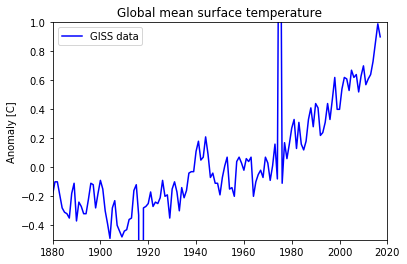

In [8]:
#########################################################################################
# Define functions
#########################################################################################
def get_gmst():
    """reads the global mean surface temperature data Public folder"""
    import numpy as np
    filename="/nfs/home11/staff/timm/Public/Data/GISS_Global_Temperature_Data_File.txt"    
    result=np.loadtxt(filename) 
    return result[:,0],result[:,1],result[:,2]
#########################################################################################
# Main part
#########################################################################################
year,temp1,temp2=get_gmst() # calls the function get_gmst and loads the data 
tcopy=np.copy(temp1)
tcopy[37]=-10.0
tcopy[95]=3.1
plt.plot(year,tcopy,color='blue',label='GISS data')
plt.title("Global mean surface temperature")
plt.xlim([1880,2020])
plt.ylim([-0.5,1.0])
plt.ylabel('Anomaly [C]')
plt.legend()


### <span style="color:darkgreen">Solution 3:</span> 

We make use of the boolean expression 'less than' (<) and 'greater than' (>). This works similar to + or * operators for arrays with single numbers. For element-wise boolean expression numpy offers functions. 

(-1, 2)

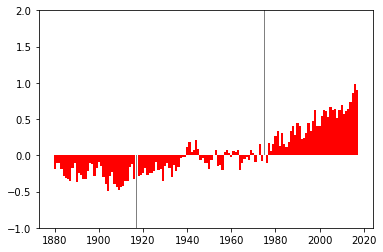

In [9]:
is_too_low=tcopy   < -3.0 
is_too_large=tcopy > +3.0
is_outlier=np.logical_or(is_too_low,is_too_large)
is_valid=np.logical_not(is_outlier)
plt.bar(year,tcopy,color='grey')
plt.bar(year[is_valid],tcopy[is_valid],color='red',width=1)
plt.ylim([-1,2])

### Working with np.NAN values:

The missing values can be handled with numpy. A special 'numerical' value can be used that is 
defined in numpy as *NAN*.
Let
We can plot the time series with gaps at the missing values by replacing them with np.NAN.







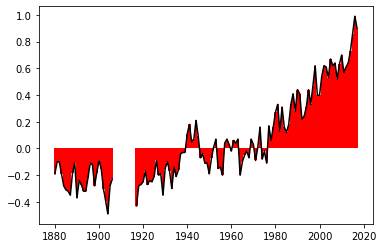

In [10]:
year,temp1,temp2=get_gmst() # calls the function get_gmst and loads the data 
tcopy=np.copy(temp1)

tcopy[27:37]=-9999.9 # insert missing values (dummy values)

is_missing=tcopy<=-9999.9
tcopy[is_missing]=np.NAN
plt.plot(year,tcopy,color='black')
plt.bar(year,tcopy,width=1,color='red')
plt.show()


### NOTE: Not all functions in numpy can handle np.NAN values. 
If you try *np.mean(tcopy)* you won't get your result. Fortunately, developers of numpy provide
functions *np.nanmean*, *np.nanmin*, *np.nanmax*, etc. They work just fine with np.NAN values.

### References:
    
[plt.fill_between function](https://matplotlib.org/examples/pylab_examples/fill_between_demo.html)

[Numpy logical functions with numpy arrays](https://docs.scipy.org/doc/numpy/reference/routines.logic.html)